In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import pyodbc
import matplotlib.pylab as plt


# Python

#### Colors <i>[Python]

In [ ]:
# color a cell
from IPython.display import HTML, display

def set_background(color):
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)

    display(HTML('<img src onerror="{}">'.format(script)))

sb = set_background
# sb("LemonChiffon")
# sb("Lavender")

<p style="background-color:pink">pink MARKDOWN cell

#### Skip <i>[Python]

In [ ]:
# skip cell
from IPython.core.magic import register_cell_magic
from IPython import get_ipython

@register_cell_magic
def skip(line, cell):
    return

@register_cell_magic
def skip_if(line, cell):
    if eval(line):
        return
    get_ipython().run_cell(cell)

# usage at top of cell: %%skip_if True

# Pandas

#### Create dataframe <i>[Pandas]

In [ ]:
df  = pd.DataFrame({"cats": [1,2,3, 2, 3], "dogs": [10,20,30, 20, 30]})
df1 = pd.DataFrame({"cats": [1,2,3, 2, 3], "dogs": [10,20,30, 20, 30]})

sr = pd.Series([0, 4, 42])

#### Open/save file <i>[Pandas]

In [ ]:
url = "https://raw.githubusercontent.com/harjotspahwa/Car-Evaluation/master/car_evaluation.csv"

df_accidents = pd.read_csv("../02.data_science/03.Data-Acquisition/old/data/accidents.csv")
df_cars      = pd.read_csv(url, header = None)
df_greentrip = pd.read_excel("../02.data_science/03.Data-Acquisition/old/data/green_tripdata_2015-09.xls")

df_accidents.to_csv("data/new.csv", index = None)

#### Dataframe operations <i>[Pandas]

In [ ]:
df["cats"]         #👈read 1 column, returns pd.Series
df.loc[0]          #👈 read 1 row (location)
df.loc[0, "dogs"]  #👈 read row/column
df_greentrip["lpep_pickup_datetime"].dt.year.unique() #👈read year from datetime type
df1.reset_index()  #👈 старият индекс става нова колона 'index'. not inplace
df1.index = df['cats']      #👈тази колона става индекс
df1.index = [0, 1, 2, 3, 4] #👈сетваме нови индекси
del df1                     #👈трием dataset, освобождаваме памет
# df1 = pd.concat([df1, df2], axis = 1) #🫷concatenate two dataframes

# Data Explore, Tidy, Clean

## Explore dataset <i> [Explore, Tidy, Clean]

,cats,dogs
0,1,10
1,2,20
3,2,20
2,3,30
4,3,30


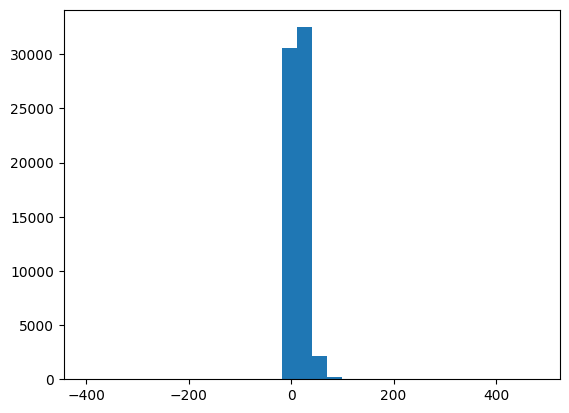

In [84]:
df.shape        #👈check number of rows/columns
df.dtypes       #👈check data type
df.describe().T #👈mean, std, min, max...
df.columns      #👈check column names
df.columns = ["cats", "dogs"] #👈rename or add column names if they don't exist
df.index                      #👈check index values
#df.set_index(date)           🫷сетваме колоната date да бъде новият индекс
df["cats"].unique()           #👈check unique values. If small number -> категорийна променлива
df.groupby("cats", observed=True).size()     #👈group by category, how many per category
# tb.groupby(["col1", "col2"]).num_cases.sum() #🫷group by 2 columns
plt.hist(df_greentrip["Total_amount"], bins=30) #👈plot histogram of one column, must be continuous
df.cats == 1                                    #👈True/False
df_greentrip[df_greentrip["Total_amount"] < 0]  #👈check in which rows Total_amount is < 0
df.loc[1, "cats"]                               #👈read by 1 row/1 column
df.loc[1, ["cats", "dogs"]]                     #👈read by 1 row/2 columns
df.loc[[2,3], ["cats", "dogs"]]                 #👈read by 2 rows/2 columns
#df.loc[("MX1704", 2010, 6, 29)]                #🫷multi-index
df.head()                       #👈or df.head(10)
df.tail()                       #👈or df.tail(10)
df.sample(3)                    #👈read random x rows
df.sample(len(df))              #👈връща всички редове разбъркани
df.dogs.nsmallest(2)            #👈nsmallest per column, or nlargest
df.sort_values("dogs")          #👈sort
#df.col.apply(function)         #🫷apply a function to all rows in this column

## Clean/tidy dataset <i> Explore, Tidy, Clean

#### Melt a table <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
pew = pd.read_csv("../02.data_science/04.Data-Tidying/old/data/pew.csv")
pew_melted = pd.melt(pew, id_vars = ["religion"], var_name = "income", value_name = "count")

#### Pivot a table <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
%%skip_if True
weather.pivot_table(index = ["id", "year", "month", "day"], columns = ["element"], values = ["value"])

#### Columns to cаtegories <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
df["cats"] = df["cats"].astype("category")      #👈if a columns has numbers, mark it as category, not inplace

In [ ]:
pew_raw = pd.read_csv("../02.data_science/04.Data-Tidying/old/data/pew.csv")
pew = pd.melt(pew_raw, id_vars = ["religion"], var_name = "income", value_name = "count")

#### Float/string to int (if there were NaN values) <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
%%skip_if True
tb.cases = tb.cases.astype(np.int64)

#### Dates

In [ ]:
%%skip_if True
billboard.week = billboard.week.str.slice(2) # remove first 2 chars

#### Add/drop column <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
pew["new_columns"] = pew["income"]
pew = pew.drop(["new_columns"], axis=1)

#### Remove rows with NaN <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
#👈remove rows witn NaN
pew_dropna = pew_melted.dropna()

#### Sort columns <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
%%skip_if True
tb = tb.sort_values(by = ["iso2", "year", "sex", "age", "cases"])

#### Reset index <i>[Explore, Tidy, Clean > Clean dataset]

In [ ]:
%%skip_if True
tb = tb.reset_index(drop = True)

# Data Tidyng and Cleaning

In [85]:
sb("Moccasin")
weather_df = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [86]:
sb("Moccasin")
weather_df

,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2012-3-10,56,40,24,24,20,16,74,50,26,...,10,10,10,13,6,17.0,0.00,0,NaN,138
1,2012-3-11,67,49,30,43,31,24,78,53,28,...,10,10,10,22,7,32.0,T,1,Rain,163
2,2012-3-12,71,62,53,59,55,43,90,76,61,...,10,10,6,24,14,36.0,0.03,6,Rain,190
3,2012-3-13,76,63,50,57,53,47,93,66,38,...,10,10,4,16,5,24.0,0.00,0,NaN,242
4,2012-3-14,80,62,44,58,52,43,93,68,42,...,10,10,10,16,6,22.0,0.00,0,NaN,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2013-3-6,32,31,29,27,26,25,92,85,78,...,10,5,1,22,9,33.0,0.04,8,Snow,314
362,2013-3-7,36,32,28,27,25,22,85,71,56,...,10,9,6,8,2,12.0,0.00,8,NaN,342
363,2013-3-8,47,35,23,27,24,21,88,65,42,...,10,9,5,12,3,14.0,0.00,1,NaN,90
364,2013-3-9,56,45,33,32,29,23,75,57,38,...,10,10,10,16,10,24.0,T,2,NaN,141
